In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [312]:
# Load the penguins dataset and drop instances with missing values
penguins = pd.read_csv('penguins.csv').dropna()

In [313]:
# Create three new binary features in the penguins DataFrame for each species
# The categorical variable species is encoded into separate columns, which can be useful for machine learning models that require numerical input.
penguins['Adelie'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
                                                      value = [int(1), int(0), int(0)])
penguins['Chinstrap'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
                                                      value = [int(0), int(1), int(0)])
penguins['Gentoo'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
                                                      value = [int(0), int(0), int(1)])

<ipython-input-313-c6b2d9d0b941>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguins['Adelie'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
<ipython-input-313-c6b2d9d0b941>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguins['Chinstrap'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
<ipython-input-313-c6b2d9d0b941>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitl

In [314]:
#displays the first few rows of the modified DataFrame to check the results
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,0


In [315]:
# Use one input feature
# Define the input feature "bill_length_mm" and the output feature "Adelie"
X = penguins[['bill_length_mm']]
y = penguins[['Adelie']]

In [316]:
# Initialize a logistic regression model, with penalty=None
logisticModel = LogisticRegression(penalty=None)

In [317]:
# Fit the model
logisticModel.fit(X, np.ravel(y))

LogisticRegression(penalty=None)

In [318]:
# Print the intercept and weight of the fitted model
print('w1:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)
logisticModel.score(X, y)

w1: [[-1.1716852]]
w0: [50.24239768]


0.9429429429429429

In [319]:
# Calculate predicted probabilities from the fitted model, .predict_proba() calculates predicted probabilities from a fitted model
probs = logisticModel.predict_proba(X)
# Calculate the predicted classes from the fitted model, .predict() returns classifications based on probabilities
classes = logisticModel.predict(X)
# Classify the first 6 instances in X
logisticModel.predict(X)[0:6]

array([1, 1, 1, 1, 1, 1])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression for Adelie, penalty: none')

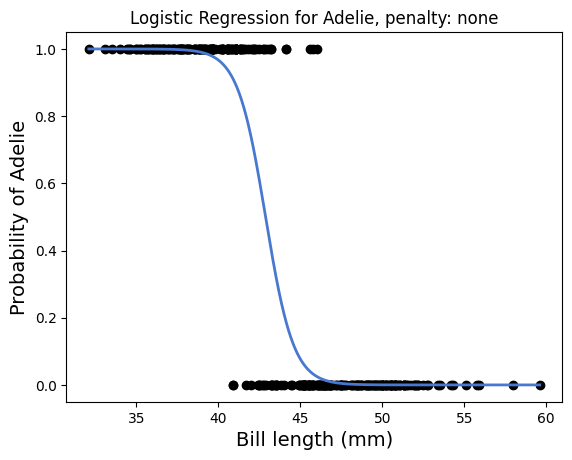

In [320]:
# Plot logistic regression model (need to be included in the submission)
plt.scatter(X, y, color='black')
xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logisticModel.predict(X).reshape(-1, 1).astype(int)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]
plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Adelie', fontsize=14)
plt.title(f'Logistic Regression for Adelie, penalty: none')

In [321]:
# Use two input features
X = penguins[['bill_length_mm', 'bill_depth_mm']]
y = penguins[['Adelie']]

In [322]:
# Initialize a logistic regression model
logisticModel = LogisticRegression(penalty=None)

In [323]:
# Fit the model
logisticModel.fit(X, np.ravel(y))

LogisticRegression(penalty=None)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


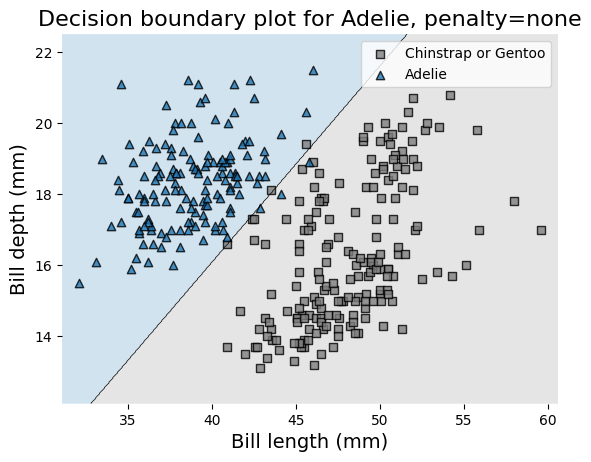

In [324]:
plt.figure()
contourf_kwargs = {'alpha': 0.2}
p = plot_decision_regions(X.to_numpy(), np.ravel(y), clf=logisticModel, contourf_kwargs=contourf_kwargs, colors='#7f7f7f,#1f77b4')
p.set_title(f'Decision boundary plot for Adelie, penalty=none', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)
L = plt.legend()
L.get_texts()[0].set_text('Chinstrap or Gentoo')
L.get_texts()[1].set_text('Adelie')
plt.show()

In [325]:
# penalty- l2

X = penguins[['bill_length_mm']]
y = penguins[['Adelie']]

In [326]:
logisticModel = LogisticRegression(penalty='l2')
# Fit the model
logisticModel.fit(X, np.ravel(y))

LogisticRegression()

In [327]:
# Print the intercept and weight of the fitted model
print('w1:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)
logisticModel.score(X, y)

w1: [[-1.14305418]]
w0: [49.01692562]


0.9429429429429429

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


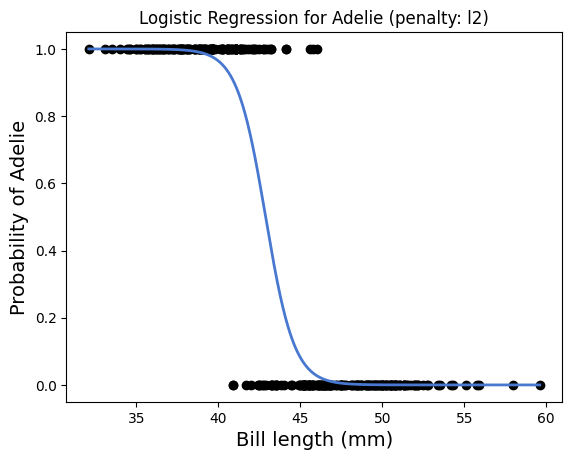

In [328]:
# Plot
plt.figure()
plt.scatter(X, y, color='black')
xrange = np.linspace(X.min(), X.max(), 10000)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]
plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel(f'Probability of Adelie', fontsize=14)
plt.title(f'Logistic Regression for Adelie (penalty: l2)')
plt.show()

In [329]:
# Use two input features
X = penguins[['bill_length_mm', 'bill_depth_mm']]
y = penguins[['Adelie']]

In [330]:
logisticModel = LogisticRegression(penalty='l2')
# Fit the model
logisticModel.fit(X, np.ravel(y))

LogisticRegression()

In [331]:
# Print the fitted model
print('w1, w2:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)

w1, w2: [[-1.37707394  1.98295306]]
w0: [24.28390878]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


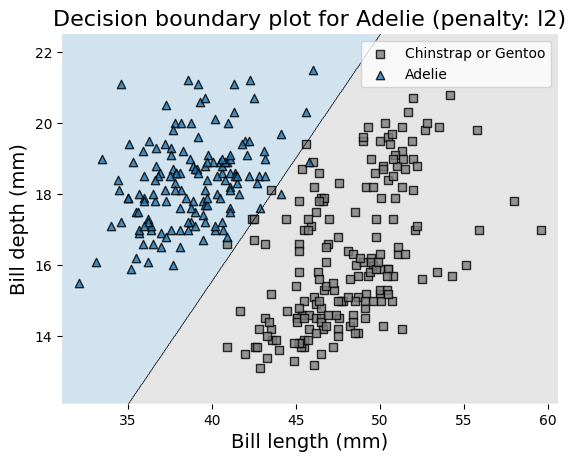

In [332]:
# Decision boundary plot
plt.figure()
contourf_kwargs = {'alpha': 0.2}
p = plot_decision_regions(X.to_numpy(), np.ravel(y), clf=logisticModel, contourf_kwargs=contourf_kwargs, colors='#7f7f7f,#1f77b4')
p.set_title(f'Decision boundary plot for Adelie (penalty: l2)', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)
L = plt.legend()
L.get_texts()[0].set_text("Chinstrap or Gentoo")
L.get_texts()[1].set_text("Adelie")
plt.show()

In [333]:
# Task2: Chinstrap

# penalty=none

# Use one feature
X = penguins[['bill_length_mm']]
y = penguins[['Chinstrap']]
# Initialize a logistic regression model, with penalty=None
logisticModel = LogisticRegression(penalty=None)

In [334]:
# Fit the model
logisticModel.fit(X, np.ravel(y))

LogisticRegression(penalty=None)

In [335]:
print('w1:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)
logisticModel.score(X, y)

w1: [[0.26976076]]
w0: [-13.77399262]


0.8108108108108109

In [336]:
probs = logisticModel.predict_proba(X)
classes = logisticModel.predict(X)
logisticModel.predict(X)[0:6]

array([0, 0, 0, 0, 0, 0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression for Chinstrap, penalty: none')

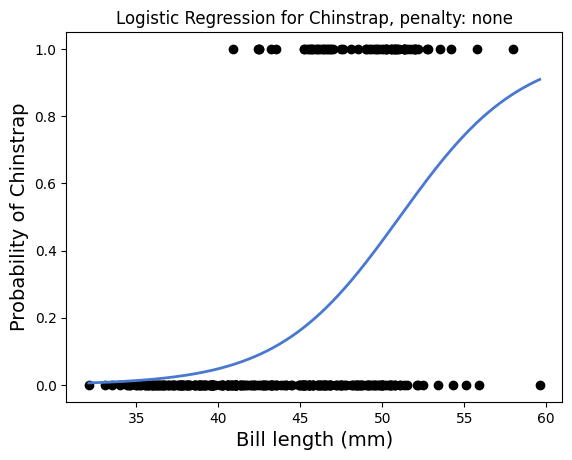

In [337]:
# Plot logistic regression model
plt.scatter(X, y, color='black')
xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logisticModel.predict(X).reshape(-1, 1).astype(int)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]
plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Chinstrap', fontsize=14)
plt.title(f'Logistic Regression for Chinstrap, penalty: none')

In [338]:
# Use two features
X = penguins[['bill_length_mm', 'bill_depth_mm']]
logisticModel.fit(X, np.ravel(y))

LogisticRegression(penalty=None)

In [339]:
print('w1, w2:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)
logisticModel.score(X, y)

w1, w2: [[0.34985645 0.8025494 ]]
w0: [-31.42822466]


0.8798798798798799

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


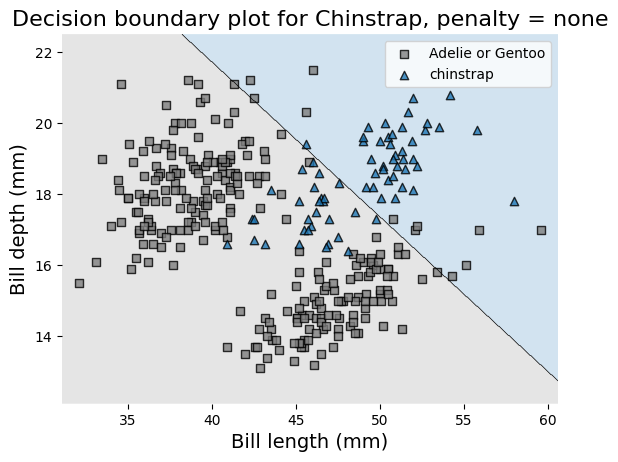

In [340]:
plt.figure()
contourf_kwargs = {'alpha': 0.2}
p = plot_decision_regions(X.to_numpy(), np.ravel(y), clf=logisticModel, contourf_kwargs=contourf_kwargs, colors='#7f7f7f,#1f77b4')
p.set_title(f'Decision boundary plot for Chinstrap, penalty = none', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)
L = plt.legend()
L.get_texts()[0].set_text('Adelie or Gentoo')
L.get_texts()[1].set_text('chinstrap')
plt.show()

In [341]:
# Chinstrap - penalty l2
# Use one feature
X = penguins[['bill_length_mm']]
logisticModel = LogisticRegression(penalty='l2')
# Fit the model
logisticModel.fit(X, np.ravel(y))

LogisticRegression()

In [342]:
# Print the intercept and weight of the fitted model
print('w1:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)
logisticModel.score(X, y)

w1: [[0.26936153]]
w0: [-13.75501826]


0.8108108108108109

In [343]:
probs = logisticModel.predict_proba(X)
classes = logisticModel.predict(X)
logisticModel.predict(X)[0:6]

array([0, 0, 0, 0, 0, 0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression for Chinstrap, penalty: l2')

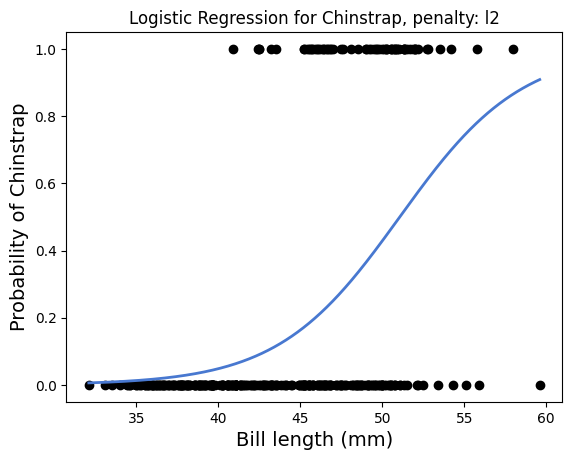

In [344]:
plt.scatter(X, y, color='black')
xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logisticModel.predict(X).reshape(-1, 1).astype(int)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]
plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Chinstrap', fontsize=14)
plt.title(f'Logistic Regression for Chinstrap, penalty: l2')

In [345]:
# two features
X = penguins[['bill_length_mm', 'bill_depth_mm']]
logisticModel.fit(X, np.ravel(y))

LogisticRegression()

In [346]:
print('w1, w2:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)
logisticModel.score(X, y)

w1, w2: [[0.34708881 0.79036638]]
w0: [-31.08350466]


0.8798798798798799

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


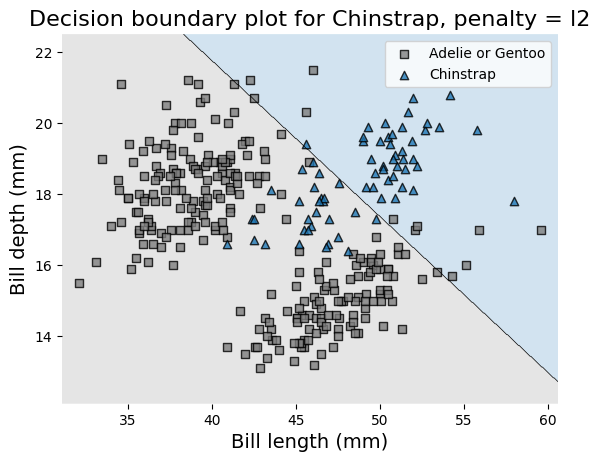

In [347]:
plt.figure()
contourf_kwargs = {'alpha': 0.2}
p = plot_decision_regions(X.to_numpy(), np.ravel(y), clf=logisticModel, contourf_kwargs=contourf_kwargs, colors='#7f7f7f,#1f77b4')
p.set_title(f'Decision boundary plot for Chinstrap, penalty = l2', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)
L = plt.legend()
L.get_texts()[0].set_text('Adelie or Gentoo')
L.get_texts()[1].set_text('Chinstrap')
plt.show()

In [348]:
# Task3: Gentoo

#penalty = none

# one feature
X = penguins[['bill_length_mm']]
y = penguins[['Gentoo']]
logisticModel = LogisticRegression(penalty=None)
logisticModel.fit(X, np.ravel(y))

LogisticRegression(penalty=None)

In [349]:
print('w1:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)
logisticModel.score(X, y)

w1: [[0.23229357]]
w0: [-11.0101527]


0.6936936936936937

In [350]:
probs = logisticModel.predict_proba(X)
classes = logisticModel.predict(X)
logisticModel.predict(X)[0:6]

array([0, 0, 0, 0, 0, 0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression for Gentoo, penalty: none')

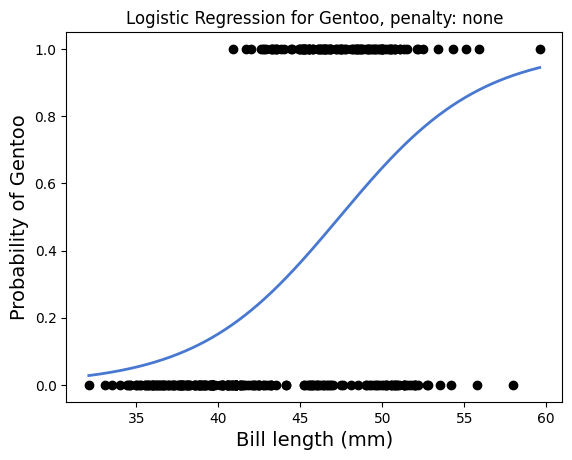

In [351]:
# Plot logistic regression model
plt.scatter(X, y, color='black')
xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logisticModel.predict(X).reshape(-1, 1).astype(int)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]
plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Gentoo', fontsize=14)
plt.title(f'Logistic Regression for Gentoo, penalty: none')

In [352]:
# two features
X = penguins[['bill_length_mm', 'bill_depth_mm']]
logisticModel.fit(X, np.ravel(y))

LogisticRegression(penalty=None)

In [353]:
print('w1, w2:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)
logisticModel.score(X, y)

w1, w2: [[ 0.55611063 -4.47532812]]
w0: [48.12121712]


0.9819819819819819

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


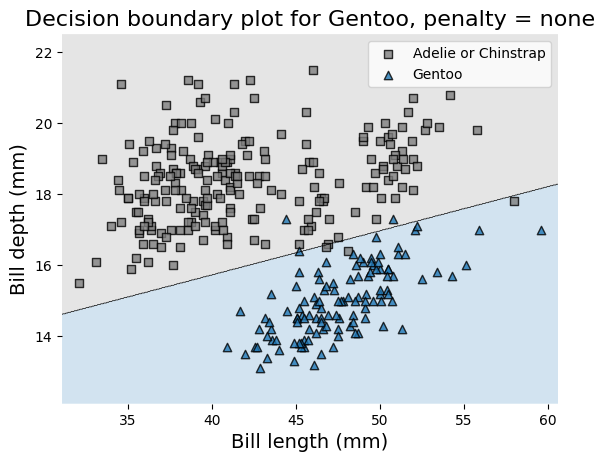

In [354]:
plt.figure()
contourf_kwargs = {'alpha': 0.2}
p = plot_decision_regions(X.to_numpy(), np.ravel(y), clf=logisticModel, contourf_kwargs=contourf_kwargs, colors='#7f7f7f,#1f77b4')
p.set_title(f'Decision boundary plot for Gentoo, penalty = none', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)
L = plt.legend()
L.get_texts()[0].set_text('Adelie or Chinstrap')
L.get_texts()[1].set_text('Gentoo')
plt.show()

In [355]:
# penalty = l2

# Use one feature
X = penguins[['bill_length_mm']]
logisticModel = LogisticRegression(penalty='l2')
# Fit the model
logisticModel.fit(X, np.ravel(y))

LogisticRegression()

In [356]:
print('w1:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)
logisticModel.score(X, y)

w1: [[0.23209661]]
w0: [-11.00116766]


0.6936936936936937

In [357]:
probs = logisticModel.predict_proba(X)
classes = logisticModel.predict(X)
logisticModel.predict(X)[0:6]

array([0, 0, 0, 0, 0, 0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression for Gentoo, penalty: l2')

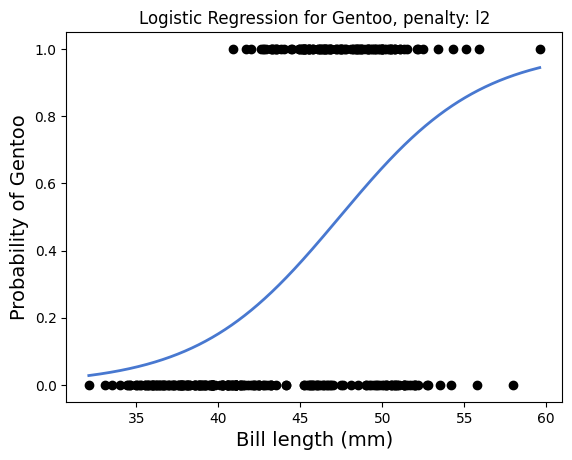

In [358]:
# Plot logistic regression model
plt.scatter(X, y, color='black')
xrange = np.linspace(X.min(), X.max(), 10000)
yhat = logisticModel.predict(X).reshape(-1, 1).astype(int)
yprob = logisticModel.predict_proba(xrange.reshape(-1, 1))[:, 1]
plt.plot(xrange, yprob, color='#4878d0', linewidth=2)
plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of Gentoo', fontsize=14)
plt.title(f'Logistic Regression for Gentoo, penalty: l2')

In [359]:
# Use two features
X = penguins[['bill_length_mm', 'bill_depth_mm']]
logisticModel.fit(X, np.ravel(y))

LogisticRegression()

In [360]:
print('w1, w2:', logisticModel.coef_)
print('w0:', logisticModel.intercept_)
logisticModel.score(X, y)

w1, w2: [[ 0.44691134 -2.9751132 ]]
w0: [28.3295998]


0.9819819819819819

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


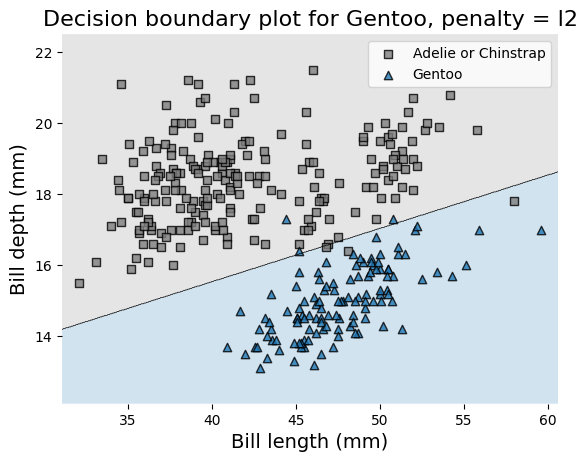

In [361]:
plt.figure()
contourf_kwargs = {'alpha': 0.2}
p = plot_decision_regions(X.to_numpy(), np.ravel(y), clf=logisticModel, contourf_kwargs=contourf_kwargs, colors='#7f7f7f,#1f77b4')
p.set_title(f'Decision boundary plot for Gentoo, penalty = l2', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)
L = plt.legend()
L.get_texts()[0].set_text('Adelie or Chinstrap')
L.get_texts()[1].set_text('Gentoo')
plt.show()